# Heston Stochastic Volatility Model
------------------
> **Idriss Afra**

This project aims to implement the Heston model (1993) and use it to price Variance and Volatility Swaps.

## Model Dynamics
The Heston model is defined by the following pair of SDEs under the Risk-Neutral measure :   

\begin{equation}
\begin{split}
dS_t & = (r_t - q_t) \times S_t \times dt + \sqrt(V_t) \times S_t \times dW^S_t \\
dV_t & = κ (θ - V_t) dt + σ \sqrt(V_t) dW^V_t \\
d<W^S, W^V>_t & = ρ × dt
\end{split}
\end{equation}

Where :    
- $S_t$ is the stock or index price
- $r_t$ is the deterministic instantaneous forward interest rate
- $q_t$ is the deterministic instantaneous forward dividend yield
- $V_t$ is the stochastic spot's variance
- $κ$ is the rate of reversion to the long-term price variance
- $θ$ is the long-term price variance
- $σ$ is the volatility of the stochastic volatility $\sqrt(V_t)$
- $\left(W^S, W^V\right)$ are $ρ$-correlated standard brownian motions

The Heston model assumes a mean-reverting stochastic variance, which makes it produce more realistic dynamics compared to Black-Scholes or Local Volatility models. Therefore, the Heston model is more suitable for long-maturity and forward-start derivatives. However, its calibration is quite complex due to the number of unkown parameters, and hence, its fit to market options prices may be too poor in some cases.

## Vanilla Heston Price

### The Fourier Inversion Theorem
This theorem links the cumulative distribution function $F_X$ to the characteristic function $ϕ_X$ :

\begin{equation}
\begin{split}
F_X(x) & = \frac{1}{2} - \frac{1}{2π} ∫_{-∞}^{+∞} \frac{e^{-iux} ϕ_X(u)}{iu} du\\
& = \frac{1}{2} - \frac{1}{2π} ∫_{-∞}^{+∞} Re\left(\frac{e^{-iux} ϕ_X(u)}{iu}\right) du \\
& = \frac{1}{2} - \frac{1}{π} ∫_{0}^{+∞} Re\left(\frac{e^{-iux} ϕ_X(u)}{iu} \right) du \\
\end{split}
\end{equation}

### The Characteristic Function
Let $X_t = log(S_t)$ and suppose that the underlying does not pay dividends.

In this case : $dX_t = (r_t - \frac{V_t}{2})dt + \sqrt(V_t) dW^S_t$

Therefore, the characteristic function of $X_T$ at $t$ is :    

$$
ϕ_{X_T}(u, t) = f\left(iu, t, X_t, V_t\right) = E^{RN}\left(e^{iuX_T} | X_t, V_t\right)
$$

$\left(ϕ_{X_T}(., t)\right)_{t \le T}$ is a Martingale by definition under the Risk-Neutral measure.

Applying the Itô's lemma and making its drift equal to zero gives the following PDE under the Risk-Neutral measure:     

$$
f_t' + \left(r_t - \frac{V_t}{2}\right)f_x' + κ (θ - V_t)f_v' + \frac{V_t}{2}f_{xx}'' + \frac{\sigma^2 V_t}{2}f_{vv}'' + σ V_t ρ f_{xv}'' = 0
$$

Further, we know that the characteristic function $\left(ϕ_{X_T}(., t)\right)_{t \le T}$ has the following exponential affine form :

$$
ϕ_{X_T}(u, t) = f\left(iu, t, X_t, V_t\right) = e^{A(t, T) + B(t, T) X_t + C(t, T) V_t +iuX_t}
$$

With : $ϕ_{X_T}(u, T) = f\left(iu, T, x, v\right) = e^{iux}$

We inject this affine form in the above PDE and solve analytically the functions $A(t, T)$, $B(t, T)$, and $C(t, T)$ :

\begin{equation}
\begin{split}
A(\tau) & = \bar{r}_{t,T} i u \tau + \frac{κθ}{σ^2} \left(-(ρσiu - κ - M)τ -2log\left(\frac{1-Ne^{Mτ}}{1-N}\right) \right) \\
B(τ) & = 0 \\
C(τ) & = \frac{(e^{Mτ} - 1)(ρσiu - κ - M)}{σ^2 (1-Ne^{Mτ})} \\
\text{Where :} \\
τ & = T - t \\
\bar{r}_{t,T} & = \frac{1}{τ} \int_t^Tr_u du \\
M & = \sqrt{(ρσiu - κ)^2 + σ^2 (iu + u^2)} \\
N & = \frac{ρσiu - κ - M}{ρσiu - κ + M} \\
\end{split}
\end{equation}

### The Vanilla Price Formula
The call vanilla option price is :

\begin{equation}
\begin{split}
C_t(T, K) & = e^{-\bar{r}_{t,T} (T-t)} E^{RN}\left( (S_T-K)^+ \right) \\
& = e^{-\bar{r}_{t,T} (T-t)} E^{RN}\left(1_{S_T>K}S_T\right) - K e^{-\bar{r}_{t,T} (T-t)} E^{RN}\left(1_{S_T>K}\right)
\end{split}
\end{equation}

Where :
\begin{equation}
\begin{split}
E^{RN}\left(1_{S_T>K}\right) & = P^{RN}\left(S_T>K\right) \\
& = 1 - F_{X_T}\left(log(K)\right) \\
& = \frac{1}{2} + \frac{1}{π} ∫_{0}^{+∞} Re\left(\frac{K^{-iu} f(iu) }{iu}\right) du \\
\end{split}
\end{equation}

On the other hand, by using the Radon-Nikodym theorem :

$$
e^{-\bar{r}_{t,T} (T-t)} E^{RN}\left(1_{S_T>K}S_T\right) = S_t E^{S}\left(1_{S_T>K}\right) = S_t P^{S}\left(S_T>K\right)
$$

And :
\begin{equation}
\begin{split}
S_t E^{S}\left(1_{S_T>K}\right) & = S_t P^{S}\left(S_T>K\right) \\
&= S_t \left(1 - F^{S}_{X_T}(log(K))\right) \\
&= S_t \left(  \frac{1}{2} + \frac{1}{π} ∫_{0}^{+∞} Re\left(\frac{K^{-iu} f^{S}(iu)}{iu}\right)du \right)\\
& = \frac{S_t}{2} + \frac{e^{-\bar{r}_{t,T} (T-t)}}{π} ∫_{0}^{+∞} Re\left(\frac{K^{-iu} f(iu+1)}{iu}\right) du \\
\end{split}
\end{equation}

Where :

\begin{equation}
\begin{split}
f^{S}(iu) & = E^{S}_{t}\left(e^{iuX_T}\right) \\
&= E^{RN}_{t}\left( \frac{S_T}{S_t e^{\bar{r}_{t,T} (T-t)}} e^{iuX_T}\right) \\
&= \frac{e^{-\bar{r}_{t,T} (T-t)}}{S_t} E^{RN}_{t}\left(e^{(1+iu)X_T}\right) \\
&= \frac{e^{-\bar{r}_{t,T} (T-t)}}{S_t} f(iu+1) \\
\end{split}
\end{equation}

Finally :

$$
C_t(T, K) = \frac{S_t}{2} + \frac{e^{-\bar{r}_{t,T} (T-t)}}{π} ∫_{0}^{+∞} Re\left(\frac{K^{-iu} f(iu+1)}{iu}\right)du - K e^{-\bar{r}_{t,T} (T-t)} \left( \frac{1}{2} + \frac{1}{π} ∫_{0}^{+∞} Re\left(\frac{K^{-iu} f(iu)}{iu}\right) du  \right)
$$

We perform a change of variable $x = e^{-u}$ to get finite boundaries in the integrations :

$$
C_t(T, K) = \frac{S_t}{2} + \frac{e^{-\bar{r}_{t,T} (T-t)}}{π} ∫_{0}^{1} Re\left(\frac{K^{ilog(x)} f(-ilog(x)+1)}{-ixlog(x)}\right)dx - K e^{-\bar{r}_{t,T} (T-t)} \left( \frac{1}{2} + \frac{1}{π} ∫_{0}^{1} Re\left(\frac{K^{ilog(x)} f(-ilog(x))}{-ixlog(x)}\right) dx  \right)
$$

Put vanilla option prices can then be computed using the call/put parity.

In [1]:
import math
import cmath
from scipy.integrate import quad

# Vanilla Option Price under the Heston model (1993)

def characteristic_func(params, x, r, T, X0) :
    """
    The characteristic function of ln(S(T)) under the Heston model.
    """
    # Heston parameters :
    kappa = params["Kappa"]
    theta = params["Theta"]
    v0 = params["Initial Variance"]
    corr = params["Correlation"]
    sigma = params["Volatility Of Volatility"]

    # Intermediate parameters :
    L = corr * sigma * x #1j * u
    M = cmath.sqrt((L - kappa)**2 + sigma**2 * (x + (x / 1j)**2))
    N = (L - kappa - M) / (L - kappa + M)
    M_T = M * T

    # Intermediate functions :
    A_T = r * x * T + (kappa * theta / sigma**2) * (-T * (L - kappa - M) - 2 * 
          cmath.log((1 - N * cmath.exp(M_T)) / (1 - N)))
    C_T = (cmath.exp(M_T) - 1) * (L - kappa - M) / ((1 - N * cmath.exp(M_T)) * sigma**2)

    # Analytical solution of the Heston characteristic function :
    return cmath.exp(A_T + C_T * v0 + x * X0)

def integral_1(params, r, T, S0, K) :
    """
    The first integration : We use the quad SciPy method based on the Fortran library QUADPACK.
    """
    func = lambda u : (K**(1j * math.log(u)) * characteristic_func(
                       params, -1j * math.log(u) + 1, r, T, math.log(S0)) / (-1j * u * math.log(u))).real
    return quad(func, 0, 1)[0] 

def integral_2(params, r, T, S0, K) :
    """
    The second integration : We use the quad SciPy method based on the Fortran library QUADPACK.
    """
    func = lambda u : (K**(1j * math.log(u)) * characteristic_func(
                       params, -1j * math.log(u), r, T, math.log(S0)) / (-1j * u * math.log(u))).real
    return quad(func, 0, 1)[0]

def heston_vanilla(params, S0, K, T, r, flavor) :
    """
    Vanilla price under the Heston model.
    The Put prices are deduced from the Call / Put parity.
    """
    call_price = 0.5 * S0 + math.exp(-r * T) * integral_1(params, r, T, S0, K) / math.pi - \
                 K * math.exp(-r * T) * (0.5 + integral_2(params, r, T, S0, K) / math.pi)
    return call_price if flavor.upper()=="CALL" else call_price - S0 + K * math.exp(-r * T)


Let's make the Heston prices match the Black-Scholes prices as a first validation test :

In [2]:
from scipy.stats import norm

def black_scholes(flavor, K, T, S, r, vol, q=0) :
    """
    The Black-Scholes price.
    """
    v2T = vol**2 * T
    d1 = (math.log(S/K) + (r - q) * T + v2T / 2) / v2T**0.5
    d2 = d1 - v2T**0.5
    phi = 1 if flavor.upper() == "CALL" else  -1
    return phi * (S * math.exp(-q * T) * norm.cdf(phi * d1) - K * math.exp(-r * T) * norm.cdf(phi * d2))

# Degenerated Test
S, K, T, r, sigma = 100, 90, 1, 0.015, 0.2
print("The test case : Call option with Spot={}, K={}, T={}, r={}, and vol={}".format(S, K, T, r, sigma))
print("To match Heston and Black models, we set the following parameter values : ")
params = {"Kappa" : 0, "Theta" : round(sigma**2, 2), "Initial Variance" : round(sigma**2, 2), 
          "Correlation" : 0, "Volatility Of Volatility" : 0.000001}
print(params)
print("-----------------------------------------------------------------------------------------------------------")
print("The Heston price : {:.6f}".format(heston_vanilla(params, 100, 90, 1, 0.015, "Call")))
print("The Black price : {:.6f}".format(black_scholes("Call", 90, 1, 100, 0.015, 0.2)))

The test case : Call option with Spot=100, K=90, T=1, r=0.015, and vol=0.2
To match Heston and Black models, we set the following parameter values : 
{'Kappa': 0, 'Theta': 0.04, 'Initial Variance': 0.04, 'Correlation': 0, 'Volatility Of Volatility': 1e-06}
-----------------------------------------------------------------------------------------------------------
The Heston price : 14.498532
The Black price : 14.498532


## Heston Calibration
In order to use the Heston model, we need to set its five different parameters : $κ$, $θ$, $V_0$, $ρ$, and $σ$.

These parameters are calibrated by minimizing the following error function :    

$$
(\kappa, θ, V_0, ρ, σ) = ArgMin \left( \frac{1}{M} \times ∑_{i = 1}^M w_i \times \left(Price_{i}^{Heston}(\kappa, θ, V_0, ρ, σ) - Price_{i}^{Market}\right)^2 \right)
$$
In practice, the weights $(w_i)_{0 \le i \le M}$ are based on Bid/Ask spreads such as higher weights are given to the more liquid options (Tight spreads).

In this project, we give equal weights to all market options and use the [Differential Evolution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html) SciPy optimization method which finds the global minimum of a multivariate function. This method does not need initial guess values and can handle non-linear constraints.  
In order to reduce the execution time, we break the minimization algorithm after finding five potential results or reaching an error below 0.01%. We also fix the maximum number of iterations at 200 and remove the polishing for the same reason.

In [3]:
from scipy.optimize import differential_evolution, NonlinearConstraint

# We ignore the differential_evolution warnings for display purposes
import warnings
warnings.filterwarnings("ignore")

def heston_calibration(S0, zc_rate, T, strikes, flavors, weights, prices) :
    """
    Heston calibration algorithm : Kappa is given in input, Corr and Vol of Vol are estimated via historical analysis.
    """
    # Params : V0, Theta, Kappa, VolOfVol, Rho
    bounds = ((0.0001, 1), (0.25, 1.5), (0.005, 3), (0.0001, 1), (-0.8, 0.))

    # The constraint 2 * Kappa * Theta > VolOfVol**2 is needed to make sure that the 
    # stochastic variance is strictly positive
    def constraint(params) :
        return 2 * params[2] * params[1] - params[3]**2 - 1e-10
    nlc = NonlinearConstraint(constraint, 1e-10, np.inf)
    
    # Prints up to five Local Minimas (Potential results) and callback the algorithm afterward
    def debugger(xk, convergence):
        error = obj_func(xk, S0, zc_rate, T, strikes, flavors, weights, prices)
        debugger.counter += 1
        print("Error at local minimum point number {} : {}".format(debugger.counter, round(error, 6)))
        if error < 1e-4 or debugger.counter == 5:
            return True
        return False
    debugger.counter = 0
    
    res = differential_evolution(obj_func, args=(S0, zc_rate, T, strikes, flavors, weights, prices),
                                bounds=bounds,
                                constraints=(nlc),
                                callback=debugger,
                                maxiter=200,
                                seed = 0,
                                polish = False)
    return res.x

def obj_func(parameters, S0, zc_rate, T, strikes, flavors, weights, prices) :
    """
    The objective function of the Heston calibration process.
    """
    nb_instrs = 0
    sse = 0
    params = {"Initial Variance" : parameters[0], "Theta" : parameters[1], "Kappa" : parameters[2],  
              "Volatility Of Volatility" : parameters[3], "Correlation" : parameters[4]}
    for j in range(len(strikes)) :
        sse += weights[j] * (prices[j] - heston_vanilla(params, S0, strikes[j], T, zc_rate, flavors[j]))**2
        nb_instrs += 1
    return sse / nb_instrs


## Application : META US Equity
Let us calibrate the Heston model on Meta US Equity European Options asof October 18th 2023.

In [4]:
from datetime import date
import numpy as np

"""
Meta US Equity Data :
"""
# Today date
now_date = date(2023, 10, 18)

# Spot Price
S0 = 316.97

# Meta US Market Data of the Tenor 4M (It does not pay Dividends!!)
market_tenor = date(2024, 2, 16)
T = (market_tenor - now_date).days / 365
fwd = 321.943
zc_rate = math.log(fwd / S0) / T
market_strikes = np.array([300, 305, 310, 315, 320, 325, 330])
market_flavors = np.array(["Put"] * 5 + ["Call"] * 2)
market_prices = np.array([21.25, 23.3, 25.475, 27.775, 30.225, 29.8, 27.575])
weights = np.array([1] * 7)

In [5]:
import timeit

print("Heston Calibration : ")
print("-----------------------------------------------------")
start = timeit.default_timer()
parameters = heston_calibration(S0, zc_rate, T, market_strikes, market_flavors, weights, market_prices)
stop = timeit.default_timer()
print("-----------------------------------------------------")
print("End of calibration after : {:.2f}s".format(stop - start))
print("-----------------------------------------------------")
print("Results :")
params = {"Kappa" : parameters[2], "Theta" : parameters[1], "Initial Variance" : parameters[0], 
          "Volatility Of Volatility" : parameters[3], "Correlation" : parameters[4]}
params

Heston Calibration : 
-----------------------------------------------------
Error at local minimum point number 1 : 0.075314
Error at local minimum point number 2 : 0.030667
Error at local minimum point number 3 : 0.017076
Error at local minimum point number 4 : 0.000452
Error at local minimum point number 5 : 0.000452
-----------------------------------------------------
End of calibration after : 83.50s
-----------------------------------------------------
Results :


{'Kappa': 2.0955746952810625,
 'Theta': 0.2935389695558195,
 'Initial Variance': 0.1562416564549356,
 'Volatility Of Volatility': 0.6145280535537911,
 'Correlation': -0.5273678881211137}

Market Prices vs Heston Calibrated Prices :
---------------------------------------------
Flavor :  Put
Strike :  300
Heston Price :  21.25
Market Price :  21.25
Absolute Calibration Error : 0.011%
---------------------------------------------
Flavor :  Put
Strike :  305
Heston Price :  23.31
Market Price :  23.3
Absolute Calibration Error : 0.064%
---------------------------------------------
Flavor :  Put
Strike :  310
Heston Price :  25.5
Market Price :  25.48
Absolute Calibration Error : 0.103%
---------------------------------------------
Flavor :  Put
Strike :  315
Heston Price :  27.81
Market Price :  27.78
Absolute Calibration Error : 0.132%
---------------------------------------------
Flavor :  Put
Strike :  320
Heston Price :  30.25
Market Price :  30.22
Absolute Calibration Error : 0.07%
---------------------------------------------
Flavor :  Call
Strike :  325
Heston Price :  29.8
Market Price :  29.8
Absolute Calibration Error : 0.016%
------------------------------------

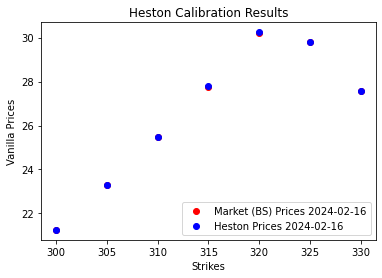

In [6]:
import matplotlib.pyplot as plt

print("Market Prices vs Heston Calibrated Prices :")
print("---------------------------------------------")

heston_prices = []
for j in range(len(market_strikes)) :
    heston_price = heston_vanilla(params, S0, market_strikes[j], T, zc_rate, market_flavors[j])
    heston_prices.append(heston_price)
    market_price = market_prices[j]
    print("Flavor : ", market_flavors[j])
    print("Strike : ", market_strikes[j])
    print("Heston Price : ", round(heston_price, 2))
    print("Market Price : ", round(market_price, 2))
    print("Absolute Calibration Error : " + str(round(100 * abs(heston_price / market_price - 1), 3)) + "%")
    print("---------------------------------------------")

plt.title("Heston Calibration Results")
plt.ylabel("Vanilla Prices")
plt.xlabel("Strikes")
plt.scatter(market_strikes, market_prices, color="red", label="Market (BS) Prices " + str(market_tenor))
plt.scatter(market_strikes, heston_prices, color="blue", label="Heston Prices " + str(market_tenor))
plt.legend(loc="lower right")
plt.show()

## Variance Swap : Fair Variance Strike

The Fair Variance Strike $K_{Var}$ is defined by : $\frac{1}{T}∫_0^TE(V_t)dt$, where $(V_t)_{t \ge 0}$ is the stochastic spot's variance.

### The Heston Model

The Fair Variance is computed  analytically under the Heston model. In fact, since :

$$
V_T = V_0 + ∫_0^Tκ(θ - V_t)dt+∫_0^Tσ\sqrt(V_t) dW^V_t
$$

Then :
$$
E(V_T) = V_0 + κθT - κ∫_0^T E(V_t)dt
$$

Which implies the following ODE :           
$$
\frac{dE(V_T)}{dT} = κθ - κE(V_T)
$$

Its solution is :    
$$
E(V_T) = θ + (V_0 - θ) e^{-κT}
$$

Hence :
$$
K_{Var} = \frac{1}{T} ∫_0^T E(V_T) = \frac{1 - e^{-κT}}{κT} V_0 + \left(1 - \frac{1 - e^{-κT}}{κT}\right) θ
$$

In [7]:
def fair_var_strike_heston(params):
    """
    The Heston Fair Var Strike
    """
    # Heston parameters :
    kappa = params["Kappa"]
    theta = params["Theta"]
    v0 = params["Initial Variance"]
    sigma = params["Volatility Of Volatility"]

    # Intermediate parameters :
    K_T = kappa * T
    exp_K_T = (1 - math.exp(- K_T)) / K_T

    return v0 * exp_K_T + theta * (1 - exp_K_T)

fair_var_heston = fair_var_strike_heston(params)
print("The Fair Variance Strike (Heston) up to {} is : {:.2f}%".format(market_tenor, 100*fair_var_heston))

The Fair Variance Strike (Heston) up to 2024-02-16 is : 19.46%


### The Market Model (Replication Method)

In practice, Variance Swaps are priced by a replication method. In fact, practitioners value Fair Variance Strikes using replication formulas with OTM call and put vanilla options.

Since : $dlog(S_t) = \left( r_t - q_t - \frac{V_t}{2} \right)dt + \sqrt{V_t}dW_t = \frac{dS_t}{S_t} - \frac{V_t}{2} dt$

Then : $\frac{1}{2}∫_0^T V_t dt = ∫_0^T \frac{dS_t}{S_t} - log\left(\frac{S_T}{S_0}\right)$

Consequently :

\begin{equation}
\begin{split}
\frac{1}{2}∫_0^T E(V_t) dt & = ∫_0^T E\left(\frac{dS_t}{S_t}\right) - E\left(log\left(\frac{S_T}{S_0}\right)\right) \\
&= ∫_0^T (r_t - q_t) dt - E\left(log\left(\frac{S_T}{S_0}\right)\right) \\
&= - E\left(log\left(\frac{S_T}{F_{0,T}}\right)\right) \\
\end{split}
\end{equation}

Where : $F_{0,T} = S_0 \times e^\left({∫_0^T (r_t - q_t) dt}\right)$ is the forward price up to $T$

Finally, the well-known Carr-Madan replication method gives the following result :

$$
K_{Var} = \frac{2}{T} \times \left( ∫_0^{F_{0,T}} \frac{1}{K^2} Put_{Vanilla}(K)dK + ∫_{F_{0,T}}^{+∞} \frac{1}{K^2} Call_{Vanilla}(K)dK \right)
$$

We perform a change of variable $K' = e^{-K}$ to get finite boundaries in the OTM calls integration :

$$
∫_{F_{0,T}}^{+∞} \frac{1}{K^2} Call_{Vanilla}(K)dK = ∫_{0}^{e^{-F_{0,T}}} \frac{Call_{Vanilla}(-log(K'))}{K' \times log(K')^2} dK'
$$

In [8]:
# Price Validation : Pricing by Replication with OTM Calls & Puts

import sys
from scipy.interpolate import interp1d

# 1 - Implied Market Volatilities : The Newton-Raphson method
def vega_bs(K, T, S, r, vol, q=0) :
    """
    The Black-Scholes Vega greek : The derivative of the option value with respect 
    to the volatility of the underlying asset.
    """
    v2T = vol**2 * T
    d2 = (math.log(S/K) + (r - q) * T - v2T / 2) / v2T**0.5
    return K * math.exp(-r * T) * norm.pdf(d2) * T**0.5

def newton_raphson(market_price, init_vol, flavor, K, T, S, r, q=0):
    """
    The Newton-Raphson algorithm : Implied volatilities from market prices
    """
    eps = 1e-07
    vol = init_vol
    func = black_scholes(flavor, K, T, S, r, vol, q) - market_price
    func_deriv = vega_bs(K, T, S, r, vol, q)
    error = sys.exit("The algorithm failed to converge. Please review the input data.") \
            if func_deriv < 0.0001 else "No error."
    next_vol = vol - func / func_deriv
    error = sys.exit("The algorithm failed to converge. Please review the input data.") \
            if next_vol < 0.0001 else "No error."
    nb_iteration = 1
    while abs(next_vol - vol) > eps :
        vol = next_vol
        func = black_scholes(flavor, K, T, S, r, vol, q) - market_price
        func_deriv = vega_bs(K, T, S, r, vol, q)
        error = sys.exit("The algorithm failed to converge. Please review the input data.") \
                if func_deriv < 0.0001 else "No error."
        next_vol = vol - func / func_deriv
        error = sys.exit("The algorithm failed to converge. Please review the input data.") \
                if next_vol < 0.0001 else "No error."
        nb_iteration += 1
        error = sys.exit("The algorithm failed to converge. Please review the input data.") \
                if nb_iteration > 300 else "No error."

    return next_vol

implied_vols = []
print("Implied Market (BS) Volatilities :")
print("--------------------------------------------------")
for k in range(len(market_strikes)) :
    implied_vols.append(newton_raphson(market_prices[k], 0.4, market_flavors[k], 
                                       market_strikes[k], T, S0, zc_rate))
    print("Implied Volatilities at {} : {}%".format(market_strikes[k], round(100*implied_vols[-1], 2)))                    
print("--------------------------------------------------")

# 2 - Market Implied Skew : Linear Interpolation & Flat Extrapolation
def skew(k):
    if k >= market_strikes[0] and k <= market_strikes[-1] :
        return interp1d(market_strikes, implied_vols, kind='cubic', fill_value="extrapolate")(k)
    else :
        return (implied_vols[0] if (k < market_strikes[0]) else implied_vols[-1])

# 3 - Fair Variance Strike by Replication
def fair_var_strike_replication():
    """
    The Fair Var Strike by Replication
    """
    otm_put = lambda k : black_scholes("Put", k, T, S0, zc_rate, skew(k)) / k**2
    otm_call = lambda k : black_scholes("Call", -np.log(k), T, S0, zc_rate, 
                          skew(-np.log(k))) / (k * np.log(k)**2)

    return (2 / T) * (quad(otm_put, 0, fwd)[0] + quad(otm_call, 0, np.exp(-fwd))[0])

fair_var_replication = fair_var_strike_replication()
print("The Fair Variance Strike (Replication) up to {} is : {:.2f}%".format(market_tenor, 100*fair_var_replication))
print("The Difference between Heston & Replicated Fair Variance Strikes is : {:.2f}%".format(
       100*abs(fair_var_replication-fair_var_heston)))

Implied Market (BS) Volatilities :
--------------------------------------------------
Implied Volatilities at 300 : 44.01%
Implied Volatilities at 305 : 43.75%
Implied Volatilities at 310 : 43.5%
Implied Volatilities at 315 : 43.26%
Implied Volatilities at 320 : 43.05%
Implied Volatilities at 325 : 42.87%
Implied Volatilities at 330 : 42.68%
--------------------------------------------------
The Fair Variance Strike (Replication) up to 2024-02-16 is : 18.51%
The Difference between Heston & Replicated Fair Variance Strikes is : 0.94%


## Volatility Swap : Fair Volatility Strike
The Fair Volatility Strike $K_{Vol}$ is defined by : $∫_0^TE\left(\sqrt{\frac{1}{T}V_t dt}\right)$, where $(V_t)_{t \ge 0}$ is the stochastic spot's variance.

### Volatility Convexity Adjustment
Since the square root function is concave, the Jensen inequality gives the following result :    

$$
K_{Vol} = ∫_0^TE\left(\sqrt{\frac{1}{T}V_t dt}\right) \le \sqrt{K_{Var}} = \sqrt{ \frac{1}{T}∫_0^TE(V_t)dt }
$$

Therefore, $∃VolConvAdj \le 0$ such as :    
$$
K_{Vol} = \sqrt{K_{Var}} + VolConvAdj
$$

### The Heston Model

A semi-analytical price of Volatility Swaps is possible under the Heston model thanks to the following equality :

$$
\sqrt{v} = \frac{1}{2 \sqrt{\pi}} ∫_{0}^{+∞} \frac{1 - e^{-xv}}{x^{1.5}}dx
$$

In fact :

$$
K_{Vol} = \frac{1}{2 \sqrt{\pi T}} ∫_{0}^{+∞} \frac{1 - E\left(e^{-x ∫_0^T V_t dt}\right)}{x^{1.5}}dx
$$

Defining $r_t = x V_t$, we have :

\begin{equation}
\begin{split}
dr_t & = xdV_t \\
&= κ (xθ - r_t) dt + \sqrt{x} σ \sqrt{r_t} dW^V_t \\
&= κ (θ' - r_t) dt + σ' \sqrt{r_t} dW^V_t \\
\end{split}
\end{equation}

Where : $θ'=xθ$ and $σ'=\sqrt{x} σ$

Therefore, $(r_t)_{t \ge 0}$ follows the Cox-Ingersoll-Ross (CIR) model (similar to $(V_t)_{t \ge 0}$)

As such, the expectection $E\left(e^{-x ∫_0^T V_t dt}\right)$ is nothing but the zero-coupon price under the CIR model. For $x \ge 0$ :

$$
E\left(e^{-x ∫_0^T V_t dt}\right) = E\left(e^{-∫_0^T r_t dt}\right) = e^{A - B \times r_0} = e^{A - B x V_0}
$$

Where :

\begin{equation}
\begin{split}
g(x) & = \sqrt{\kappa^2 + 2x σ^2} \\
B(x) & = \frac{2 \left( 1 - e^{-g(x)T} \right)}{\left(g(x)+\kappa\right)\left(1-e^{-g(x)T}\right)+2g(x)e^{-g(x)T}} \\
A(x) & = \frac{\kappa\theta}{\sigma^2} \times \left( \left(\kappa + g(x)\right)T - 2 log\left( 1 + \frac{\left( g(x) + \kappa \right) \left( e^{g(x)T} - 1 \right)}{2g(x)} \right) \right)
\end{split}
\end{equation}

In summary, the annulized expected volatility is given by the integration :

$$
K_{Vol} = \frac{1}{2\sqrt{\pi T}} ∫_{0}^{+∞}\frac{1 - e^{A(x)-B(x)xV_0}}{x^{1.5}}dx
$$

We perform a change of variable $x' = e^{-x}$ to get finite boundaries in the integration :

$$
K_{Vol} = \frac{1}{2\sqrt{\pi T}} ∫_{0}^{1}\frac{1 - e^{A(-log(x'))+B(-log(x'))log(x')V_0}}{x'(-log(x'))^{1.5}}dx'
$$

In [9]:
def fair_vol_strike_heston(params):
    """
    The Heston Fair Vol Strike
    """
    # Heston parameters :
    kappa = params["Kappa"]
    theta = params["Theta"]
    v0 = params["Initial Variance"]
    sigma = params["Volatility Of Volatility"]

    # Intermediate functions :
    g = lambda x : np.sqrt(kappa**2 + 2 * x * sigma**2)
    B = lambda x : 2 * (1 - np.exp(-g(x) * T)) / ((g(x) + kappa) * (1 - np.exp(-g(x) * T)) + 2 * g(x) * np.exp(-g(x) * T))
    A = lambda x : (kappa * theta / sigma**2) * (
                   (kappa + g(x)) * T - 2 * np.log(1 + (g(x) + kappa) * (np.exp(g(x) * T) - 1) / (2 * g(x))))

    # Main function :
    f = lambda x : (1 - np.exp(A(-np.log(x)) + B(-np.log(x)) * np.log(x) * v0)) / (x * (-np.log(x))**1.5)
    
    return quad(f, 0, 1)[0] / (2 * np.sqrt(math.pi * T))

fair_vol_heston = fair_vol_strike_heston(params)
print("The Fair Volatility Strike (Heston) up to {} is : {:.2f}%".format(market_tenor, 100*fair_vol_heston))
print("The Square-Root of the Fair Variance Strike (Heston) up to {} is : {:.2f}%".format(market_tenor, 
                                                                                   100*math.sqrt(fair_var_heston)))
print("The Convexity Adjustment up to {} is : {:.2f}%".format(market_tenor, 
                                                       100*(fair_vol_heston - math.sqrt(fair_var_heston))))

The Fair Volatility Strike (Heston) up to 2024-02-16 is : 34.52%
The Square-Root of the Fair Variance Strike (Heston) up to 2024-02-16 is : 44.11%
The Convexity Adjustment up to 2024-02-16 is : -9.59%
